<a href="https://colab.research.google.com/github/Manos-Mak120/-/blob/Vectorization/VECTOR_TRUMP_NEWSBOMB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import seaborn as sns

In [2]:
 !python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 100.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
nlp = spacy.load('el_core_news_sm')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
trump_articles_df = pd.read_csv("/content/drive/MyDrive/Εργασία Python/Articles/trump_articles_df_2025.csv2")
trump_articles_df.head(200) # This is a syntax error - head() takes an int argument not slice

,article_url,title,date,time,section,author,excerpt,text_body,feat_img_link,feat_img_cation
0,https://www.newsbomb.gr/kosmos/story/1645898/s...,«Σχέδιο Β» της Ευρώπης εάν ο Τραμπ εγκαταλείψε...,2025-04-30,22:43:56+03:00,ΚΟΣΜΟΣ,Newsbomb,"«Υπάρχουν εργαλεία στα χέρια των Αμερικανών, π...",ΗΕυρωπαϊκή Ένωσηετοιμάζει «σχέδιο Β» για τιςοι...,https://img.bbmd.gr/img/1260/max/82/2025/04/30...,AP.
1,https://www.newsbomb.gr/kosmos/story/1645874/t...,Τραμπ: Είμαστε έτοιμοι να υπογράψουμε και σήμε...,2025-04-30,21:06:03+03:00,ΚΟΣΜΟΣ,Newsbomb,Ο πρόεδρος των Ηνωμένων Πολιτειών Ντόναλντ Τρα...,"Ο Ντόναλντ Τραμπ, απαντώντας σε ερώτηση δημοσι...",https://img.bbmd.gr/img/1260/max/82/2025/04/30...,Ο πρόεδρος Ντόναλντ Τραμπ μιλάει κατά τη διάρκ...
2,https://www.newsbomb.gr/kosmos/story/1645864/t...,Τραμπ: «Η Κίνα τα πάει πολύ άσχημα αυτή τη στι...,2025-04-30,20:18:56+03:00,ΚΟΣΜΟΣ,Newsbomb,Έκθεση δείχνει συρρίκνωση της κινεζικής εργοστ...,Τη διαπίστωση ότι η οικονομία τηςΚίνας«πηγαίνε...,https://img.bbmd.gr/img/1260/max/82/2025/04/30...,Ο πρόεδρος Ντόναλντ Τραμπ μιλάει κατά τη διάρκ...
3,https://www.newsbomb.gr/kosmos/story/1645860/i...,ΗΠΑ: Κινδυνεύει με απέλαση η Αμάλ Κλούνεΐ - Ο ...,2025-04-30,20:05:44+03:00,ΚΟΣΜΟΣ,Newsbomb,Πιθανή απαγόρευση εισόδου στις ΗΠΑ για τη γνωσ...,"Η Αμάλ Κλούνεΐ,δικηγόρος ανθρωπίνων δικαιωμάτω...",https://img.bbmd.gr/img/1260/max/82/2025/04/30...,Ο George Clooney και η σύζυγός του Amal Cloone...
4,https://www.newsbomb.gr/kosmos/story/1645828/s...,Συμφωνία ΗΠΑ-Ουκρανίας: Εμπόδια της τελευταίας...,2025-04-30,17:52:52+03:00,ΚΟΣΜΟΣ,Newsbomb,Αιφνίδιες διαφωνίες καθυστερούν την υπογραφή κ...,Ησυμφωνία Ηνωμένων Πολιτειών και Ουκρανίας για...,https://img.bbmd.gr/img/1260/max/82/2025/04/26...,AP Photo/Ben Curtis
...,...,...,...,...,...,...,...,...,...,...
195,https://www.newsbomb.gr/politikh/story/1641067...,Βενιζέλος για ελληνοτουρκικά: Δεν χρειάζεται ν...,2025-04-10,13:00:10+03:00,ΠΟΛΙΤΙΚΗ,Newsbomb,«Οι πρωτοβουλίες Τραμπ θέτουν υπό αμφισβήτηση ...,Τα ζητήματα ασφαλείας σε αυτή την κρίσιμη γεωπ...,https://img.bbmd.gr/img/1260/max/82/2025/04/10...,Delphi Economic Forum
196,https://www.newsbomb.gr/politikh/story/1641056...,Μητσοτάκης για δασμούς: Η ΕΕ να εκμεταλλευτεί ...,2025-04-10,12:18:59+03:00,ΠΟΛΙΤΙΚΗ,Newsbomb,«Θέλω να εκφράσω την ικανοποίησή μου για το γε...,"Στους δασμούς των ΗΠΑ, των οποίων η εφαρμογή α...",https://img.bbmd.gr/img/1260/max/82/2025/04/10...,Γραφείο Τύπου πρωθυπουργού
197,https://www.newsbomb.gr/i-gata-tis-irodou-atti...,"Μία πρώτη αποτίμηση από Μαξίμου για Τέμπη, δασ...",2025-04-10,11:49:34+03:00,Η «ΓΑΤΑ» ΤΗΣ ΗΡΩΔΟΥ ΑΤΤΙΚΟΥ,Δημήτρης Κοτταρίδης,Οι εντός και εκτός εξελίξεις απασχολούν το Μαξ...,Την εκτίμηση πως σιγά σιγά το κλίμα αναστρέφετ...,https://img.bbmd.gr/img/1260/max/82/2025/04/10...,NaN
198,https://www.newsbomb.gr/kosmos/story/1641024/k...,Κίνα: Με βίντεο του Μάο Τσε Τουνγκ απαντά στου...,2025-04-10,10:37:34+03:00,ΚΟΣΜΟΣ,Κυριάκος Κουζούμης,Το μήνυμα του υπουργείου Εξωτερικών της Κίνας ...,Την ώρα πουξεκινά ο εμπορικός πόλεμοςανάμεσα σ...,https://img.bbmd.gr/img/1260/max/82/2025/04/10...,"Ο Μάο Τσε Τουνγκ, ηγέτης της Κίνας από το 1949..."


In [6]:
trump_articles_df.head(1)

,article_url,title,date,time,section,author,excerpt,text_body,feat_img_link,feat_img_cation
0,https://www.newsbomb.gr/kosmos/story/1645898/s...,«Σχέδιο Β» της Ευρώπης εάν ο Τραμπ εγκαταλείψε...,2025-04-30,22:43:56+03:00,ΚΟΣΜΟΣ,Newsbomb,"«Υπάρχουν εργαλεία στα χέρια των Αμερικανών, π...",ΗΕυρωπαϊκή Ένωσηετοιμάζει «σχέδιο Β» για τιςοι...,https://img.bbmd.gr/img/1260/max/82/2025/04/30...,AP.


In [7]:
trump_articles_df.loc[0, 'date']

'2025-04-30'

In [8]:
trump_articles_df.dtypes

,0
article_url,object
title,object
date,object
time,object
section,object
author,object
excerpt,object
text_body,object
feat_img_link,object
feat_img_cation,object


In [9]:
trump_articles_df['time'] = trump_articles_df['time'].astype(str)

# Extract only the hour and minute from the time string using string slicing
# Assumes the format is consistently 'HH:MM:SS' or similar at the start
trump_articles_df['time_formatted'] = trump_articles_df['time'].str[:5]

datetime_str = trump_articles_df['date'].astype(str) + ' ' + trump_articles_df['time_formatted']

# Convert the combined string column to datetime objects
# Use the format that matches the concatenated string
trump_articles_df['datetime'] = pd.to_datetime(datetime_str, format='%Y-%m-%d %H:%M')

# Display the first few rows to verify the new 'datetime' column
trump_articles_df.head()

,article_url,title,date,time,section,author,excerpt,text_body,feat_img_link,feat_img_cation,time_formatted,datetime
0,https://www.newsbomb.gr/kosmos/story/1645898/s...,«Σχέδιο Β» της Ευρώπης εάν ο Τραμπ εγκαταλείψε...,2025-04-30,22:43:56+03:00,ΚΟΣΜΟΣ,Newsbomb,"«Υπάρχουν εργαλεία στα χέρια των Αμερικανών, π...",ΗΕυρωπαϊκή Ένωσηετοιμάζει «σχέδιο Β» για τιςοι...,https://img.bbmd.gr/img/1260/max/82/2025/04/30...,AP.,22:43,2025-04-30 22:43:00
1,https://www.newsbomb.gr/kosmos/story/1645874/t...,Τραμπ: Είμαστε έτοιμοι να υπογράψουμε και σήμε...,2025-04-30,21:06:03+03:00,ΚΟΣΜΟΣ,Newsbomb,Ο πρόεδρος των Ηνωμένων Πολιτειών Ντόναλντ Τρα...,"Ο Ντόναλντ Τραμπ, απαντώντας σε ερώτηση δημοσι...",https://img.bbmd.gr/img/1260/max/82/2025/04/30...,Ο πρόεδρος Ντόναλντ Τραμπ μιλάει κατά τη διάρκ...,21:06,2025-04-30 21:06:00
2,https://www.newsbomb.gr/kosmos/story/1645864/t...,Τραμπ: «Η Κίνα τα πάει πολύ άσχημα αυτή τη στι...,2025-04-30,20:18:56+03:00,ΚΟΣΜΟΣ,Newsbomb,Έκθεση δείχνει συρρίκνωση της κινεζικής εργοστ...,Τη διαπίστωση ότι η οικονομία τηςΚίνας«πηγαίνε...,https://img.bbmd.gr/img/1260/max/82/2025/04/30...,Ο πρόεδρος Ντόναλντ Τραμπ μιλάει κατά τη διάρκ...,20:18,2025-04-30 20:18:00
3,https://www.newsbomb.gr/kosmos/story/1645860/i...,ΗΠΑ: Κινδυνεύει με απέλαση η Αμάλ Κλούνεΐ - Ο ...,2025-04-30,20:05:44+03:00,ΚΟΣΜΟΣ,Newsbomb,Πιθανή απαγόρευση εισόδου στις ΗΠΑ για τη γνωσ...,"Η Αμάλ Κλούνεΐ,δικηγόρος ανθρωπίνων δικαιωμάτω...",https://img.bbmd.gr/img/1260/max/82/2025/04/30...,Ο George Clooney και η σύζυγός του Amal Cloone...,20:05,2025-04-30 20:05:00
4,https://www.newsbomb.gr/kosmos/story/1645828/s...,Συμφωνία ΗΠΑ-Ουκρανίας: Εμπόδια της τελευταίας...,2025-04-30,17:52:52+03:00,ΚΟΣΜΟΣ,Newsbomb,Αιφνίδιες διαφωνίες καθυστερούν την υπογραφή κ...,Ησυμφωνία Ηνωμένων Πολιτειών και Ουκρανίας για...,https://img.bbmd.gr/img/1260/max/82/2025/04/26...,AP Photo/Ben Curtis,17:52,2025-04-30 17:52:00


In [11]:
short_trump_df = trump_articles_df[['datetime','excerpt']]
short_trump_df = short_trump_df.reset_index(drop=True)
# Now that short_biden_df is defined, we can localize the timezone
short_trump_df['datetime'] = short_trump_df['datetime'].dt.tz_localize(None)
short_trump_df.head(1)

,datetime,excerpt
0,2025-04-30 22:43:00,"«Υπάρχουν εργαλεία στα χέρια των Αμερικανών, π..."


In [12]:
short_trump_df['datetime'] = short_trump_df['datetime'].dt.tz_localize(None)

In [13]:
short_trump_df = trump_articles_df[['datetime','excerpt']]
short_trump_df = short_trump_df.reset_index(drop=True)
short_trump_df.head(1)

,datetime,excerpt
0,2025-04-30 22:43:00,"«Υπάρχουν εργαλεία στα χέρια των Αμερικανών, π..."


In [14]:
short_trump_df['year'] = pd.DatetimeIndex(short_trump_df['datetime']).year
short_trump_df['month'] = pd.DatetimeIndex(short_trump_df['datetime']).month
short_trump_df['day'] = pd.DatetimeIndex(short_trump_df['datetime']).day
short_trump_df['hour'] = pd.DatetimeIndex(short_trump_df['datetime']).hour

In [15]:
short_trump_df.head()

,datetime,excerpt,year,month,day,hour
0,2025-04-30 22:43:00,"«Υπάρχουν εργαλεία στα χέρια των Αμερικανών, π...",2025,4,30,22
1,2025-04-30 21:06:00,Ο πρόεδρος των Ηνωμένων Πολιτειών Ντόναλντ Τρα...,2025,4,30,21
2,2025-04-30 20:18:00,Έκθεση δείχνει συρρίκνωση της κινεζικής εργοστ...,2025,4,30,20
3,2025-04-30 20:05:00,Πιθανή απαγόρευση εισόδου στις ΗΠΑ για τη γνωσ...,2025,4,30,20
4,2025-04-30 17:52:00,Αιφνίδιες διαφωνίες καθυστερούν την υπογραφή κ...,2025,4,30,17


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
cv = CountVectorizer() #πάντα αυτό

In [19]:
short_trump_df.head(5)

,datetime,excerpt,year,month,day,hour
0,2025-04-30 22:43:00,"«Υπάρχουν εργαλεία στα χέρια των Αμερικανών, π...",2025,4,30,22
1,2025-04-30 21:06:00,Ο πρόεδρος των Ηνωμένων Πολιτειών Ντόναλντ Τρα...,2025,4,30,21
2,2025-04-30 20:18:00,Έκθεση δείχνει συρρίκνωση της κινεζικής εργοστ...,2025,4,30,20
3,2025-04-30 20:05:00,Πιθανή απαγόρευση εισόδου στις ΗΠΑ για τη γνωσ...,2025,4,30,20
4,2025-04-30 17:52:00,Αιφνίδιες διαφωνίες καθυστερούν την υπογραφή κ...,2025,4,30,17


In [20]:
short_trump_df.shape

(1470, 6)

In [21]:
short_trump_df['excerpt'] = short_trump_df['excerpt'].fillna('')

In [22]:
count_vector = cv.fit_transform(short_trump_df['excerpt']) #παίρνουμε τα κείμενα

In [23]:
count_vector #μοναδικές λέξεις 11520 + 120

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 27956 stored elements and shape (1470, 6522)>

In [24]:
count_vector.shape

(1470, 6522)

In [25]:
BoW = cv.get_feature_names_out()
list(BoW)[1400:1410]

['αυτοψία',
 'αυτού',
 'αυτό',
 'αυτόματη',
 'αυτόν',
 'αυτός',
 'αυτόχθονες',
 'αυτών',
 'αφήνοντας',
 'αφήνουν']

In [26]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,01,02,03,04,06,10,100,100η,...,ύλης,ύπατος,ύποπτος,ύστερα,ύφεση,ύφεσης,ύψους,ώρα,ώρες,ώστε
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [28]:
count_vector = cv.fit_transform(short_trump_df['excerpt'])

Ο νέος μας πίνακας έχει περίπου 400 στήλες λιγότερες (εφόσον δεν μπήκαν στο BoW τα stopwords)

In [29]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,01,02,03,04,06,10,100,100η,...,όχημα,όψει,ύλης,ύπατος,ύποπτος,ύφεση,ύφεσης,ύψους,ώρα,ώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), max_df=0.95, min_df=0.01) #πάρε ο,τι είναι πάνω του 95% των κειμένων

In [31]:
count_vector = cv.fit_transform(short_trump_df['excerpt'])

In [32]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,000,20,25,street,wall,άνοδο,έλον,αγορές,αμερικής,αμερικανική,...,τραμπ,τόνισε,υπουργός,υόρκης,φαίνεται,φορά,χρηματιστήριο,χρόνια,χώρα,χώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20) # δειξε μου τα 20 πιο συχνά
count_vector = cv.fit_transform(short_trump_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,αμερικανός,δασμοί,δασμούς,δασμών,είπε,ζελένσκι,ηπα,λευκό,νέα,ντόναλντ,οίκο,ουκρανία,πούτιν,προέδρου,πρόεδρο,πρόεδρος,σήμερα,συμφωνία,σύμφωνα,τραμπ
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Vectorizer με stop words, max features και token pattern**

In [34]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20) # δειξε μου τα 20 πιο συχνά
count_vector = cv.fit_transform(short_trump_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,αμερικανός,δασμοί,δασμούς,δασμών,είπε,ζελένσκι,ηπα,λευκό,νέα,ντόναλντ,οίκο,ουκρανία,πούτιν,προέδρου,πρόεδρο,πρόεδρος,σήμερα,συμφωνία,σύμφωνα,τραμπ
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_trump_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,wall street,έλον μασκ,αμερικανού προέδρου,αμερικανός πρόεδρος,βλαντιμίρ πούτιν,βολοντίμιρ ζελένσκι,εκλεγμένος πρόεδρος,ηνωμένες πολιτείες,ηνωμένων πολιτειών,ηπα ντόναλντ,λευκό οίκο,νέας υόρκης,ντόναλντ τραμπ,πρόεδρο ηπα,πρόεδρος ηπα,πρόεδρος ντόναλντ,πρόεδρος τραμπ,συνεδρίαση χρηματιστήριο,υόρκης wall,χρηματιστήριο νέας
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
results.sum(axis =0).sort_values(ascending = False) #Προσθήκη axis στο συνολο των αποτελσμάτων . Στα rows. Μελετάει τις εμφανίσεις αυτού τοτ term.

,0
ντόναλντ τραμπ,487
πρόεδρος ηπα,72
λευκό οίκο,62
ηπα ντόναλντ,49
αμερικανός πρόεδρος,44
πρόεδρος ντόναλντ,35
έλον μασκ,28
wall street,26
αμερικανού προέδρου,26
βολοντίμιρ ζελένσκι,26


In [37]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

,0
ντόναλντ τραμπ,487
πρόεδρος ηπα,72
λευκό οίκο,62
ηπα ντόναλντ,49
αμερικανός πρόεδρος,44


**Vectorizer με χρήση λεξικού**

In [38]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,  #Με αυτό το τρόπο φτιάχνουμε ένα λεξικό παίρνωντας τις λέξεις
                     vocabulary = ['εκλογές', 'πρόεδρος', 'ορκομωσία'])
count_vector = cv.fit_transform(short_trump_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,εκλογές,πρόεδρος,ορκομωσία
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,0,0


In [39]:
results.sort_values(by=['εκλογές'], ascending=False).head()

,εκλογές,πρόεδρος,ορκομωσία
596,1,0,0
806,1,0,0
30,1,0,0
481,1,0,0
24,1,0,0


In [40]:
short_trump_df['excerpt'].loc[10]

'Οι πωλήσεις της Coca-Cola μειώνονται από τις πολιτικές «Πρώτα η Αμερική» του Ντόναλντ Τραμπ. Πολλοί καταναλωτές ανά τον πλανήτη αποφεύγουν τα εμβληματικά για τις ΗΠΑ αναψυκτικά, αναφέρουν οι Financial Times'

Τώρα αν θέλω μπορώ να κοιτάξω τι διγράμματα υπάρχουν σ' συτό άρθρο

In [41]:
# Add 'title' to the list of columns to select
short_trump_df = trump_articles_df[['date','excerpt', 'title']]
short_trump_df = short_trump_df.reset_index(drop=True)
# Ensure there are no NaN values in the 'excerpt' column before vectorization
short_trump_df['excerpt'] = short_trump_df['excerpt'].fillna('')
short_trump_df.head(1)

,date,excerpt,title
0,2025-04-30,"«Υπάρχουν εργαλεία στα χέρια των Αμερικανών, π...",«Σχέδιο Β» της Ευρώπης εάν ο Τραμπ εγκαταλείψε...


In [42]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=10, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_trump_df.iloc[[10]]['excerpt'])
results114 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
sum_words114 =  results114.sum(axis =0)
sum_words114.sort_values(ascending = False).head()

,0
coca cola,1
cola μειώνονται,1
financial times,1
αμερική ντόναλντ,1
αναφέρουν financial,1


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_trump_df['excerpt'])  #finds the tfidf score with normalization

In [45]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

,000,10,100,11,12,17,20,2020,2025,25,...,χρήση,χρηματιστήριο,χρόνια,χωρών,χώρα,χώρας,χώρες,ύψους,ώρα,ώρες
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Cosine similarity (ομοιότητα κειμένων)**

In [46]:
from sklearn.metrics.pairwise import cosine_similarity #ΚΑΤΑ ΠΟΣΟ ΤΑ ΑΡΘΡΑ ΜΟΥ ΔΙΑΦΕΡΟΥΝ ΑΠΟ ΤΟΥΣ ΥΠΟΛΟΙΠΟΥΣ. ΠΟΣΟ ΟΙ ΑΛΛΟΙ ΕΧΟΥΝ ΕΠΗΡΕΑΣΤΕΙ ΑΠΟ ΜΕΝΑ

print("cosine scores ==> ")
print(cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with all elements (including itself)

cosine scores ==> 
[[1.         0.08284288 0.         ... 0.         0.07241067 0.        ]]


In [47]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train) # συγκρίνουμε όλα τα άρθρα μεταξύ τους

In [48]:
len(arr)

1470

<Axes: >

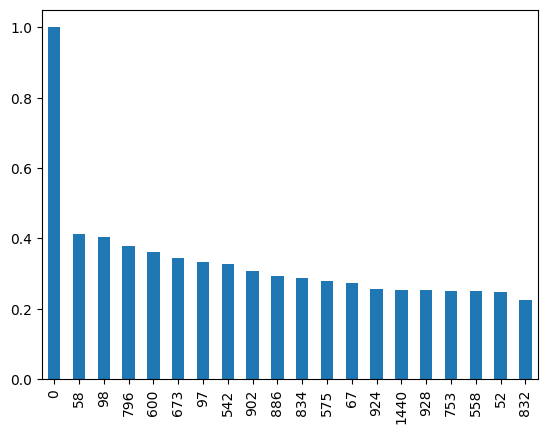

In [49]:
pd.DataFrame(arr).loc[0].sort_values(ascending = False).head(20).plot(kind = 'bar')

Βλέπουμε ότι με το 1ο άρθρο μοιάζει περισσότερο το 4ο

In [50]:
short_trump_df['excerpt'].loc[0]

'«Υπάρχουν εργαλεία στα χέρια των Αμερικανών, που μπορούν να χρησιμοποιήσουν ώστε να ασκήσουν πίεση στη Ρωσία και να σταματήσει πραγματικά αυτός ο πόλεμος στην Ουκρανία», σημείωσε η\xa0Κάγια Κάλας'

In [51]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_trump_df['excerpt'])  #finds the tfidf score with normalization

In [52]:
short_trump_df['excerpt'].loc[4]

'Αιφνίδιες διαφωνίες καθυστερούν την υπογραφή κρίσιμων συμφωνιών που σχετίζονται με επενδύσεις στον ορυκτό πλούτο της Ουκρανίας'

<Axes: >

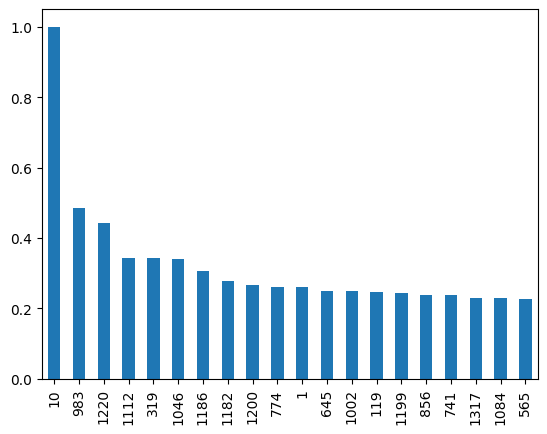

In [53]:
pd.DataFrame(arr).loc[10].sort_values(ascending = False).head(20).plot(kind = 'bar')

<Axes: >

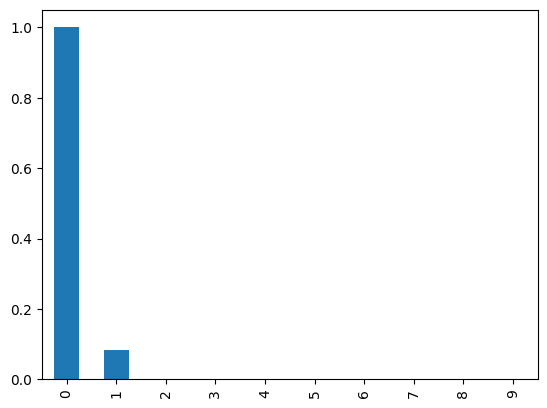

In [60]:
pd.DataFrame(arr).loc[0].sort_values(ascending = False).tail(20).plot(kind = 'bar')

In [55]:
short_trump_df['excerpt'].loc[10]

'Οι πωλήσεις της Coca-Cola μειώνονται από τις πολιτικές «Πρώτα η Αμερική» του Ντόναλντ Τραμπ. Πολλοί καταναλωτές ανά τον πλανήτη αποφεύγουν τα εμβληματικά για τις ΗΠΑ αναψυκτικά, αναφέρουν οι Financial Times'

In [56]:
short_trump_df['excerpt'].loc[15]

'«Το γεγονός να υποκύπτεις σε έναν νταή, είναι σαν να πίνεις δηλητήριο για να ξεδιψάσεις, απλώς επιδεινώνει την κρίση», αναφέρει\xa0το υπουργείο Εξωτερικών της Κίνας'

In [57]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10]) # συγκρίνουμε τα 10 πρώτα άρθρα μεταξύ τους

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων (Τράμπ: Newsbomb)'}>

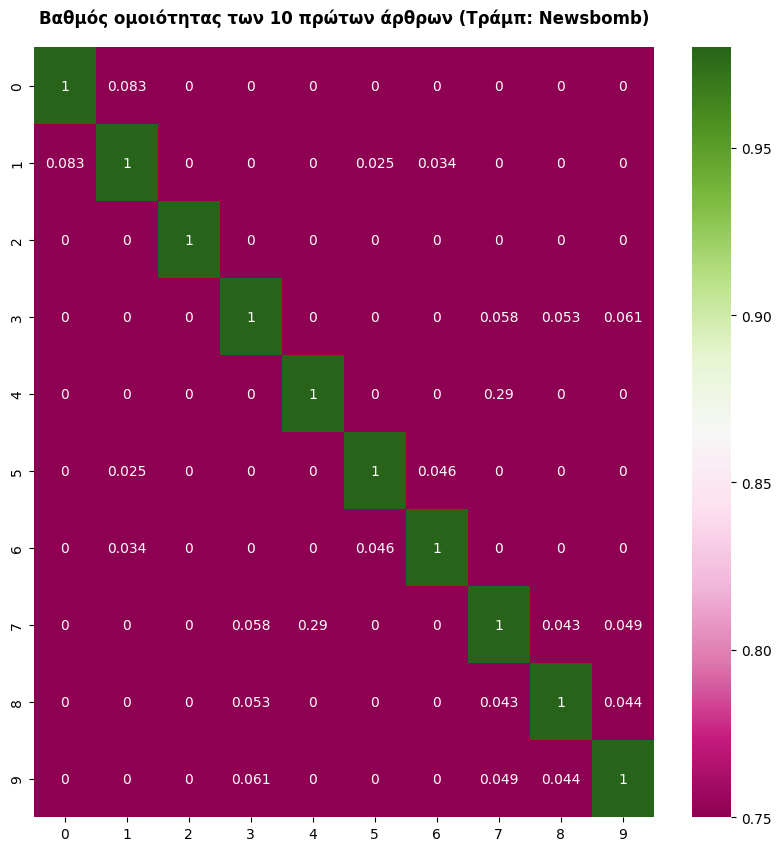

In [58]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων (Τράμπ: Newsbomb)', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα

sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")

#plt.savefig('<το path και το όνομα του αρχείου>.png')

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

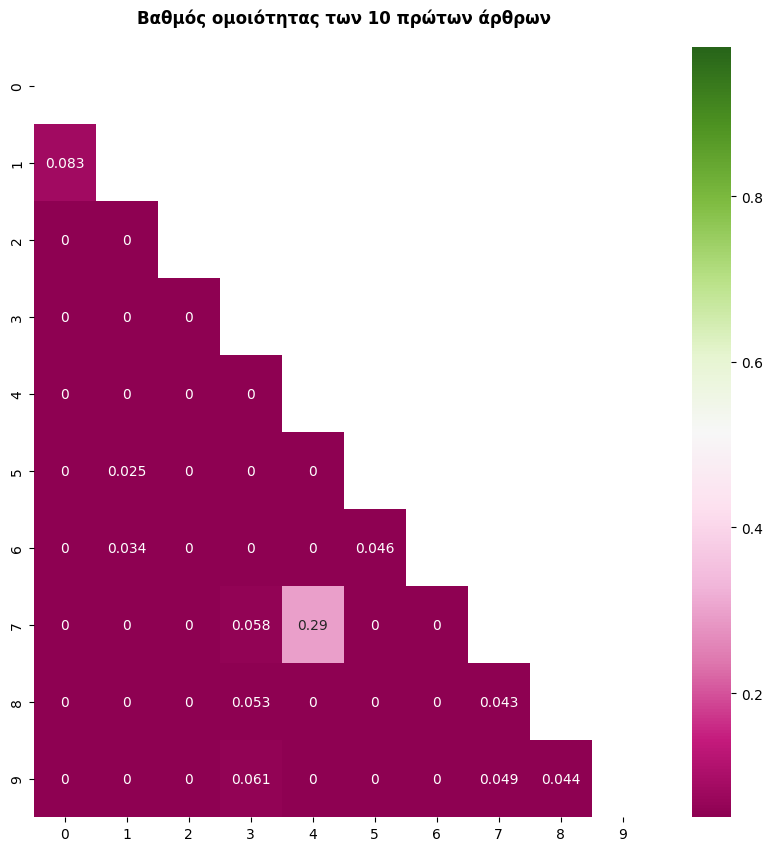

In [59]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα

# mask
mask = np.triu(np.ones_like(arr, dtype=bool))
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG", mask=mask)

#plt.savefig('<το path και το όνομα του αρχείου>.png')